# day1

# Section1：入力層〜中間層
### 要点まとめ
- 入力：入力データ
- ノード：データを受け取る場所（入力データ数＝ノード数）
- 重み：各データの重要度合を表す(傾き)
- バイアス：値を偏らせるために広く同じ値を設定する際に使用する（切片）
- 総入力：各入力データに対して重みを掛け、全てを合計したものにバイアスをプラスしたもの

### 確認テスト
「この図式に動物分類の実例を入れてみよう。」
### 考察
入力にはデータの特徴量が入力される。<br>
アヤメの分類でいうところの、がく片の長さやがく片の幅。



### 確認テスト
「この数式をPythonで書け。」
### 考察
入力データと重みの内積をnumpyのdotメソッドを使用して計算している。

### 確認テスト
「1-1のファイルから、中間層の出力を定義しているソースを抜き出せ。」
### 考察
dotメソッドにて計算した総入力にReLU関数（functions.relu）を通して出力している。

### 実装演習

In [ ]:
cd /content/drive/MyDrive/study_ai/DNN_code_colab_ver200425

/content/drive/MyDrive/study_ai/DNN_code_colab_ver200425


In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

### 順伝播（3層・複数ユニット）

In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


# Section2：活性化関数
### 要点まとめ
- ニューラルネットワークにおいて、次の層への出力の大きさを決める非線形の関数。入力値の値によって、次の層への信号のON/OFFや強弱を定める働きをもつ。
- 中間層用：sigmoid関数、tanh関数、ReLU関数、ステップ関数
- 出力層用：sigmoid関数、softmax関数、恒等写像

### 確認テスト
「線形と非線形の違いを図に書いて簡易に説明せよ。」
### 考察
線形な関数は加法性と斉次性を満たすが、非線形な関数は両方とも満たさない。



### 確認テスト
「配布されたソースコードより、該当する箇所を抜き出せ。」
### 考察
commonフォルダからfunctionファイルを読み込んで使用している。functionファイル内に様々な活性化関数が記述されている。

### functionファイル内に記述されている活性化関数のコード

In [ ]:
# 中間層の活性化関数
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# ReLU関数
def relu(x):
    return np.maximum(0, x)

# Section3：出力層
### 要点まとめ
中間層からの出力を入力として受け取り、分類問題における各クラスの確率や回帰問題における予測値を出力する。誤差関数を用い、正解データとの誤差も算出する。誤差関数は、回帰問題は恒等写像を、分類問題は交差エントロピーを用いる。

### 確認テスト
- なぜ、引き算でなく二乗するか述べよ
- 1/2はどういう意味を持つか述べよ
### 考察
誤差を相殺する工夫や微分の計算をやりやすくする工夫等が行われている。複雑なモノをシンプルに考えれるようにすることが重要。

### 確認テスト
ソフトマックス関数<br>
「①〜③の数式に該当するソースコードを示し、一行ずつ処理の
説明をせよ。」
### 考察
numpy sum関数とexp関数を使用している。求めたいクラスを全体で割って確率を計算している。

### 確認テスト
交差エントロピー関数<br>
「①〜②の数式に該当するソースコードを示し、一行ずつ処理の
説明をせよ。」
### 考察
交差エントロピー誤差は分類問題でよく使用する。対数関数はｘが０に近づくとyが-∞に近づく為、ごくわずかな値（1e-7）をプラスすることでｘが０にならないようにし、計算がスムーズに動くようにしている。

### functionファイル内に記述されているソフトマックス関数と交差エントロピー関数のコード

In [ ]:
# 出力層の活性化関数
# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

# ソフトマックスとクロスエントロピーの複合関数
def softmax_with_loss(d, x):
    y = softmax(x)
    return cross_entropy_error(d, y)

# 誤差関数
# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2

# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size


# Section4：勾配降下法
### 要点まとめ
ニューラルネットワークのパラメータを最適化する為に使用する。最適化とは、誤差を最小化するパラメータを見つけることである。また、学習率を適切に設定することで、局所最適解ではなく、大域的最適解に辿り着ける。学習率を最適化する為にいくつかの学習率最適化手法がある。（Momentum、AdaGrad、Adadelta、Adam）最近ではAdamがよく使われる。<br>

- 勾配降下法
 - 全データの平均誤差を最小化
- 確率的勾配降下法（SGD）
 - ランダムに抽出したサンプルの誤差を最小化
 - 計算コストを軽減
 - 局所最適解に収束するリスクを軽減
 - オンライン学習が可能
- ミニバッチ勾配降下法
 - ランダムに分割したデータの集合（ミニバッチ）に属するサンプルの平均誤差を最小化
 - オンライン学習にて計算コストを軽減
 - CPUを使用したスレッド並列化やGPUを利用したSingle Instruction Multi Data（SIMD）並列化が可能

### 確認テスト
「オンライン学習とは何か」
### 考察
メモリ容量により学習できるデータ量が制限され、一度に全データを学習することが難しい為、オンライン学習のようなデータを小分けにして学習する手法が必要となる。

# Section5：誤差逆伝播法
### 要点まとめ
数値微分では各パラメータそれぞれについて計算する
為、順伝搬の計算を繰り返し行う必要があり負荷が高くなる。誤差逆伝播法では算出された誤差を出力層側から順に微分し、前の層へ伝播することで最小の計算で各パラメータでの微分値を解析的に計算する。

### 確認テスト
「誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。」
### 考察
誤差関数の結果Eを予測結果yで微分した結果であるdelta2を、重みW2の転置とドット積で掛けたものに、活性化関数の微分を掛けている。同じように後ろから前へ微分の結果を伝播させる事で、計算コストを削減している。

# 確率勾配降下法

##### 結果表示 #####


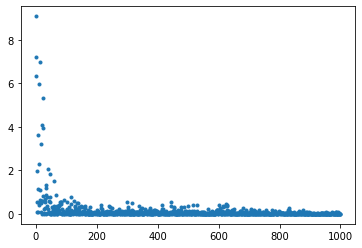

In [ ]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

# day2

# Section1：勾配消失問題
### 要点まとめ
活性化関数にシグモイド関数等の微分形が1より小さくなるモノを使用した場合、誤差逆伝播が進むに連れて勾配がどんどん緩やかになり、層が多い場合は勾配が消失してしまう。これを解消する方法として、ReLU関数の使用、重みの初期値の工夫（Xavier、He）、バッチ正規化等がある。

### 確認テスト
「シグモイド関数を微分した時、入力値が０の時に最大値をとる。その値として正しい物を選択肢から選べ。」
### 考察
シグモイド関数では微分の最大値が0.25となり必ず1以下となることから、誤差逆伝播が進むに連れて勾配が小さくなる。


### 確認テスト
「重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。」
### 考察
学習を正しく行う為には表現力を高く維持する必要があり、重みの初期値はできるだけ偏らないようにすべきである。その為にXavierやHeといった初期値を使用する。


### 実装演習

In [ ]:
cd /content/drive/MyDrive/study_ai/DNN_code_colab_ver200425

/content/drive/MyDrive/study_ai/DNN_code_colab_ver200425


## multi layer network class

In [ ]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt


class MultiLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size_list: 隠れ層のノード数のリスト
    output_size: 出力層のノード数
    activation: 活性化関数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成, sigmoidとreluのみ扱う
        activation_layer = {'sigmoid': layers.Sigmoid, 'relu': layers.Relu}
        self.layers = OrderedDict() # 追加した順番に格納
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = layers.SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, d):
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]

        return self.last_layer.forward(y, d) + weight_decay

    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        for idx in range(1, self.hidden_layer_num+2):
            grad['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grad['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grad


## vanishing sample

## sigmoid - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1032
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.17
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.09
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.16
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.1135
Generat

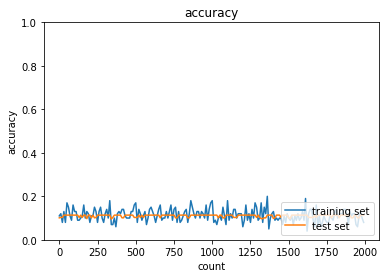

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - gauss

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.11
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.04
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.101
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.101
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.101
Generation: 90. 正答率(トレーニング) = 0.07
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.09
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.07
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.08
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.05
                : 130. 正答率(テスト) = 0.1135
Generation: 1

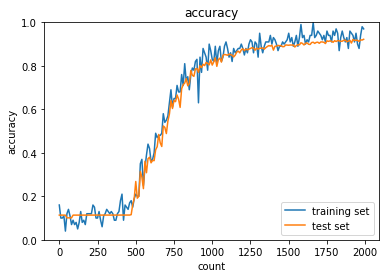

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## sigmoid - Xavier

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1028
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1028
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.15
                : 40. 正答率(テスト) = 0.1379
Generation: 50. 正答率(トレーニング) = 0.29
                : 50. 正答率(テスト) = 0.2854
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.282
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.1187
Generation: 80. 正答率(トレーニング) = 0.16
                : 80. 正答率(テスト) = 0.1212
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.2333
Generation: 100. 正答率(トレーニング) = 0.24
                : 100. 正答率(テスト) = 0.1628
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.34
Generation: 120. 正答率(トレーニング) = 0.16
                : 120. 正答率(テスト) = 0.203
Generation: 130. 正答率(トレーニング) = 0.44
                : 130. 正答率(テスト) = 0.3956
Generation:

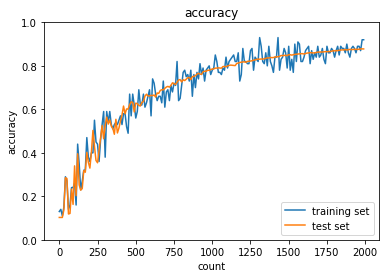

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## ReLU - He

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.24
                : 10. 正答率(テスト) = 0.2631
Generation: 20. 正答率(トレーニング) = 0.39
                : 20. 正答率(テスト) = 0.3523
Generation: 30. 正答率(トレーニング) = 0.55
                : 30. 正答率(テスト) = 0.4848
Generation: 40. 正答率(トレーニング) = 0.58
                : 40. 正答率(テスト) = 0.5843
Generation: 50. 正答率(トレーニング) = 0.74
                : 50. 正答率(テスト) = 0.6748
Generation: 60. 正答率(トレーニング) = 0.87
                : 60. 正答率(テスト) = 0.7752
Generation: 70. 正答率(トレーニング) = 0.82
                : 70. 正答率(テスト) = 0.7828
Generation: 80. 正答率(トレーニング) = 0.79
                : 80. 正答率(テスト) = 0.8246
Generation: 90. 正答率(トレーニング) = 0.92
                : 90. 正答率(テスト) = 0.8642
Generation: 100. 正答率(トレーニング) = 0.85
                : 100. 正答率(テスト) = 0.86
Generation: 110. 正答率(トレーニング) = 0.88
                : 110. 正答率(テスト) = 0.8782
Generation: 120. 正答率(トレーニング) = 0.92
                : 120. 正答率(テスト) = 0.8776
Generation: 130. 正答率(トレーニング) = 0.9
                : 130. 正答率(テスト) = 0.8723
Generation

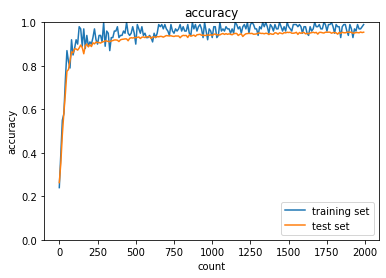

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] hidden_size_listの数字を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.57
                : 10. 正答率(テスト) = 0.4731
Generation: 20. 正答率(トレーニング) = 0.7
                : 20. 正答率(テスト) = 0.6845
Generation: 30. 正答率(トレーニング) = 0.75
                : 30. 正答率(テスト) = 0.7431
Generation: 40. 正答率(トレーニング) = 0.8
                : 40. 正答率(テスト) = 0.8028
Generation: 50. 正答率(トレーニング) = 0.86
                : 50. 正答率(テスト) = 0.7615
Generation: 60. 正答率(トレーニング) = 0.84
                : 60. 正答率(テスト) = 0.8119
Generation: 70. 正答率(トレーニング) = 0.89
                : 70. 正答率(テスト) = 0.8403
Generation: 80. 正答率(トレーニング) = 0.89
                : 80. 正答率(テスト) = 0.8528
Generation: 90. 正答率(トレーニング) = 0.87
                : 90. 正答率(テスト) = 0.8584
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.8725
Generation: 110. 正答率(トレーニング) = 0.87
                : 110. 正答率(テスト) = 0.8691
Generation: 120. 正答率(トレーニング) = 0.95
                : 120. 正答率(テスト) = 0.8876
Generation: 130. 正答率(トレーニング) = 0.96
                : 130. 正答率(テスト) = 0.8885
Generatio

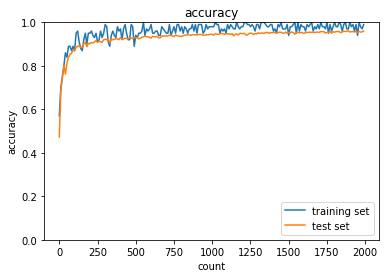

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

#hidden_size_list=[60, 40]へ変更
network = MultiLayerNet(input_size=784, hidden_size_list=[60, 40], output_size=10, activation='relu', weight_init_std='He')


iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] sigmoid - He と relu - Xavier についても試してみよう
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## sigmoid - He

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.0861
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1015
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1278
Generation: 40. 正答率(トレーニング) = 0.31
                : 40. 正答率(テスト) = 0.2657
Generation: 50. 正答率(トレーニング) = 0.24
                : 50. 正答率(テスト) = 0.29
Generation: 60. 正答率(トレーニング) = 0.25
                : 60. 正答率(テスト) = 0.2718
Generation: 70. 正答率(トレーニング) = 0.35
                : 70. 正答率(テスト) = 0.3536
Generation: 80. 正答率(トレーニング) = 0.41
                : 80. 正答率(テスト) = 0.406
Generation: 90. 正答率(トレーニング) = 0.29
                : 90. 正答率(テスト) = 0.2716
Generation: 100. 正答率(トレーニング) = 0.28
                : 100. 正答率(テスト) = 0.3495
Generation: 110. 正答率(トレーニング) = 0.44
                : 110. 正答率(テスト) = 0.4175
Generation: 120. 正答率(トレーニング) = 0.43
                : 120. 正答率(テスト) = 0.408
Generation: 130. 正答率(トレーニング) = 0.54
                : 130. 正答率(テスト) = 0.4682
Generation:

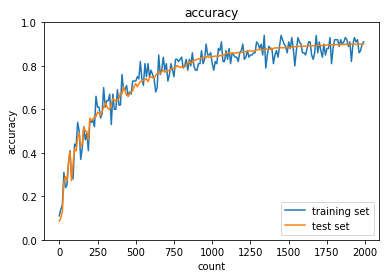

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## relu - Xavier

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.38
                : 10. 正答率(テスト) = 0.2841
Generation: 20. 正答率(トレーニング) = 0.33
                : 20. 正答率(テスト) = 0.3822
Generation: 30. 正答率(トレーニング) = 0.5
                : 30. 正答率(テスト) = 0.5064
Generation: 40. 正答率(トレーニング) = 0.54
                : 40. 正答率(テスト) = 0.6101
Generation: 50. 正答率(トレーニング) = 0.73
                : 50. 正答率(テスト) = 0.6686
Generation: 60. 正答率(トレーニング) = 0.74
                : 60. 正答率(テスト) = 0.7337
Generation: 70. 正答率(トレーニング) = 0.8
                : 70. 正答率(テスト) = 0.7502
Generation: 80. 正答率(トレーニング) = 0.82
                : 80. 正答率(テスト) = 0.7954
Generation: 90. 正答率(トレーニング) = 0.85
                : 90. 正答率(テスト) = 0.8187
Generation: 100. 正答率(トレーニング) = 0.84
                : 100. 正答率(テスト) = 0.8372
Generation: 110. 正答率(トレーニング) = 0.85
                : 110. 正答率(テスト) = 0.8341
Generation: 120. 正答率(トレーニング) = 0.92
                : 120. 正答率(テスト) = 0.8533
Generation: 130. 正答率(トレーニング) = 0.85
                : 130. 正答率(テスト) = 0.8598
Generatio

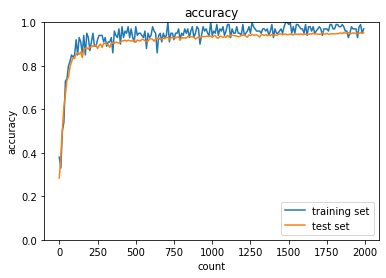

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# batch normalization

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/study_ai/DNN_code_colab_ver200425/lesson_2')
sys.path.append('/content/drive/MyDrive/study_ai/DNN_code_colab_ver200425')

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# バッチ正則化 layer
class BatchNormalization:
    '''
    gamma: スケール係数
    beta: オフセット
    momentum: 慣性
    running_mean: テスト時に使用する平均
    running_var: テスト時に使用する分散
    '''
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None

        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0) # 平均
            xc = x - mu # xをセンタリング
            var = np.mean(xc**2, axis=0) # 分散
            std = np.sqrt(var + 10e-7) # スケーリング
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu # 平均値の加重平均
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var #分散値の加重平均
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        
        return out

    def backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx    


データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16
                : 10. 正答率(テスト) = 0.1197
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1533
Generation: 30. 正答率(トレーニング) = 0.22
                : 30. 正答率(テスト) = 0.1844
Generation: 40. 正答率(トレーニング) = 0.21
                : 40. 正答率(テスト) = 0.2238
Generation: 50. 正答率(トレーニング) = 0.22
                : 50. 正答率(テスト) = 0.2733
Generation: 60. 正答率(トレーニング) = 0.28
                : 60. 正答率(テスト) = 0.3147
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.3539
Generation: 80. 正答率(トレーニング) = 0.37
                : 80. 正答率(テスト) = 0.3981
Generation: 90. 正答率(トレーニング) = 0.43
                : 90. 正答率(テスト) = 0.4195
Generation: 100. 正答率(トレーニング) = 0.5
                : 100. 正答率(テスト) = 0.4521
Generation: 110. 正答率(トレーニング) = 0.49
                : 110. 正答率(テスト) = 0.4832
Generation: 120. 正答率(トレーニング) = 0.46
                : 120. 正答率(テスト) = 0.5132
Generation: 130. 正答率(トレーニング) = 0.58
                : 130. 正答率(テスト) = 0.5398
Generatio

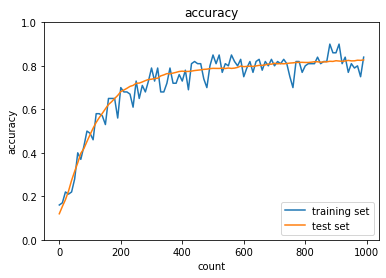

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 活性化関数や重みの初期値を変えてみよう
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2
                : 10. 正答率(テスト) = 0.1838
Generation: 20. 正答率(トレーニング) = 0.32
                : 20. 正答率(テスト) = 0.2702
Generation: 30. 正答率(トレーニング) = 0.34
                : 30. 正答率(テスト) = 0.3343
Generation: 40. 正答率(トレーニング) = 0.38
                : 40. 正答率(テスト) = 0.3946
Generation: 50. 正答率(トレーニング) = 0.47
                : 50. 正答率(テスト) = 0.4464
Generation: 60. 正答率(トレーニング) = 0.53
                : 60. 正答率(テスト) = 0.4966
Generation: 70. 正答率(トレーニング) = 0.56
                : 70. 正答率(テスト) = 0.549
Generation: 80. 正答率(トレーニング) = 0.68
                : 80. 正答率(テスト) = 0.5847
Generation: 90. 正答率(トレーニング) = 0.69
                : 90. 正答率(テスト) = 0.6164
Generation: 100. 正答率(トレーニング) = 0.63
                : 100. 正答率(テスト) = 0.6498
Generation: 110. 正答率(トレーニング) = 0.68
                : 110. 正答率(テスト) = 0.6811
Generation: 120. 正答率(トレーニング) = 0.75
                : 120. 正答率(テスト) = 0.6972
Generation: 130. 正答率(トレーニング) = 0.7
                : 130. 正答率(テスト) = 0.7108
Generation

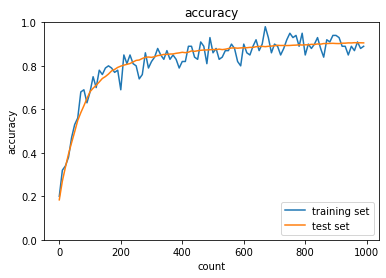

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Section2：学習率最適化手法
### 要点まとめ
- 学習率は大きすぎると学習が上手くいかずに発散する可能性がある。また、小さすぎると学習効率が悪くなり、さらに大域的最適解に辿り着けずに局所最適解にはまってしまう可能性がある。これらの問題を解決する為に学習率最適化手法を使用する。学習率最適化手法では、初期の学習率を大きく設定し、徐々に学習率を小さくしていく。また、パラメータ毎に学習率を可変させる。
- 学習率最適化手法：モメンタム、AdaGrad、RMSProp、Adam 等

### 確認テスト
「モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。」
### 考察
- モメンタム：局所最適解にはならず、大域的最適解となる。また、最適値に行くまでの時間が早い。
- AdaGrad：勾配の緩やかな斜面に対して最適値に近づける。学習率が徐々に小さくなるので鞍点問題を引き起こす事がある。
- RMSProp：局所最適解にはならず、大域的最適解となる。また、ハイパーパラメータの調整が必要な場合が少ない。

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.098
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.098
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.09
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.14
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.1
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.07
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.08
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.16
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.09
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.14
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.14
                : 130. 正答率(テスト) = 0.1135
Generation:

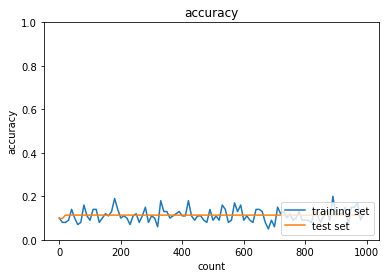

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.0892
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.098
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1028
Generation: 60. 正答率(トレーニング) = 0.14
                : 60. 正答率(テスト) = 0.1996
Generation: 70. 正答率(トレーニング) = 0.11
                : 70. 正答率(テスト) = 0.101
Generation: 80. 正答率(トレーニング) = 0.18
                : 80. 正答率(テスト) = 0.1619
Generation: 90. 正答率(トレーニング) = 0.28
                : 90. 正答率(テスト) = 0.2615
Generation: 100. 正答率(トレーニング) = 0.33
                : 100. 正答率(テスト) = 0.2636
Generation: 110. 正答率(トレーニング) = 0.36
                : 110. 正答率(テスト) = 0.2752
Generation: 120. 正答率(トレーニング) = 0.32
                : 120. 正答率(テスト) = 0.2844
Generation: 130. 正答率(トレーニング) = 0.27
                : 130. 正答率(テスト) = 0.2896
Generatio

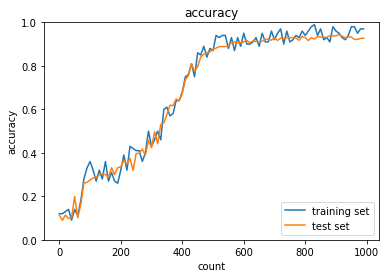

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.101
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.1396
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.1325
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1513
Generation: 50. 正答率(トレーニング) = 0.2
                : 50. 正答率(テスト) = 0.2415
Generation: 60. 正答率(トレーニング) = 0.29
                : 60. 正答率(テスト) = 0.2404
Generation: 70. 正答率(トレーニング) = 0.28
                : 70. 正答率(テスト) = 0.234
Generation: 80. 正答率(トレーニング) = 0.18
                : 80. 正答率(テスト) = 0.2369
Generation: 90. 正答率(トレーニング) = 0.21
                : 90. 正答率(テスト) = 0.2263
Generation: 100. 正答率(トレーニング) = 0.27
                : 100. 正答率(テスト) = 0.2501
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.2432
Generation: 120. 正答率(トレーニング) = 0.22
                : 120. 正答率(テスト) = 0.2466
Generation: 130. 正答率(トレーニング) = 0.28
                : 130. 正答率(テスト) = 0.2413
Generation

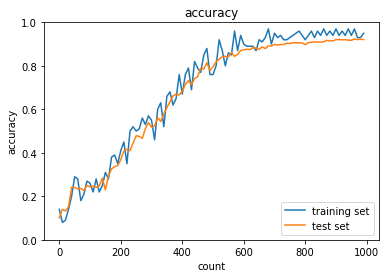

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1736
Generation: 30. 正答率(トレーニング) = 0.29
                : 30. 正答率(テスト) = 0.2983
Generation: 40. 正答率(トレーニング) = 0.29
                : 40. 正答率(テスト) = 0.3071
Generation: 50. 正答率(トレーニング) = 0.38
                : 50. 正答率(テスト) = 0.342
Generation: 60. 正答率(トレーニング) = 0.37
                : 60. 正答率(テスト) = 0.3087
Generation: 70. 正答率(トレーニング) = 0.35
                : 70. 正答率(テスト) = 0.3977
Generation: 80. 正答率(トレーニング) = 0.6
                : 80. 正答率(テスト) = 0.4868
Generation: 90. 正答率(トレーニング) = 0.58
                : 90. 正答率(テスト) = 0.5321
Generation: 100. 正答率(トレーニング) = 0.55
                : 100. 正答率(テスト) = 0.5787
Generation: 110. 正答率(トレーニング) = 0.71
                : 110. 正答率(テスト) = 0.6098
Generation: 120. 正答率(トレーニング) = 0.66
                : 120. 正答率(テスト) = 0.6297
Generation: 130. 正答率(トレーニング) = 0.77
                : 130. 正答率(テスト) = 0.6582
Generatio

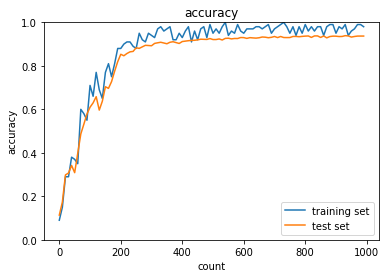

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.0892
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1032
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1032
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.1184
Generation: 50. 正答率(トレーニング) = 0.23
                : 50. 正答率(テスト) = 0.2448
Generation: 60. 正答率(トレーニング) = 0.19
                : 60. 正答率(テスト) = 0.2151
Generation: 70. 正答率(トレーニング) = 0.35
                : 70. 正答率(テスト) = 0.3233
Generation: 80. 正答率(トレーニング) = 0.33
                : 80. 正答率(テスト) = 0.3649
Generation: 90. 正答率(トレーニング) = 0.4
                : 90. 正答率(テスト) = 0.3747
Generation: 100. 正答率(トレーニング) = 0.62
                : 100. 正答率(テスト) = 0.5077
Generation: 110. 正答率(トレーニング) = 0.48
                : 110. 正答率(テスト) = 0.5122
Generation: 120. 正答率(トレーニング) = 0.59
                : 120. 正答率(テスト) = 0.5652
Generation: 130. 正答率(トレーニング) = 0.51
                : 130. 正答率(テスト) = 0.5739
Generati

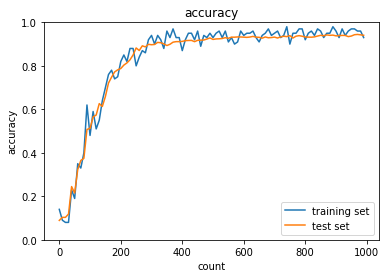

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] バッチ正規化をして変化を見てみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.3
                : 10. 正答率(テスト) = 0.2847
Generation: 20. 正答率(トレーニング) = 0.42
                : 20. 正答率(テスト) = 0.4107
Generation: 30. 正答率(トレーニング) = 0.57
                : 30. 正答率(テスト) = 0.5367
Generation: 40. 正答率(トレーニング) = 0.61
                : 40. 正答率(テスト) = 0.6686
Generation: 50. 正答率(トレーニング) = 0.7
                : 50. 正答率(テスト) = 0.7015
Generation: 60. 正答率(トレーニング) = 0.74
                : 60. 正答率(テスト) = 0.7397
Generation: 70. 正答率(トレーニング) = 0.78
                : 70. 正答率(テスト) = 0.774
Generation: 80. 正答率(トレーニング) = 0.81
                : 80. 正答率(テスト) = 0.7723
Generation: 90. 正答率(トレーニング) = 0.78
                : 90. 正答率(テスト) = 0.7766
Generation: 100. 正答率(トレーニング) = 0.86
                : 100. 正答率(テスト) = 0.82
Generation: 110. 正答率(トレーニング) = 0.79
                : 110. 正答率(テスト) = 0.8251
Generation: 120. 正答率(トレーニング) = 0.85
                : 120. 正答率(テスト) = 0.8376
Generation: 130. 正答率(トレーニング) = 0.79
                : 130. 正答率(テスト) = 0.8162
Generation: 

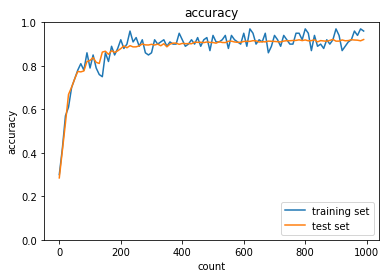

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Section3：過学習
### 要点まとめ
一部の入力データに対して極端な反応を示している状態を過学習という。重みが大きい値をとることで過学習が発生する事がある為、重みを大きくなりすぎないようにする（Weight decay）方法として、誤差に対して正則化項を加算することで重みを抑制し、過学習を防ぐ。正則化手法にはL1、L2正則化等がある。また、ドロップアウトも有効である。

### 確認テスト
「下図について、L1正則化を表しているグラフはどちらか答えよ。」
### 考察
誤差関数の等高線と正則化項の等高線が交わった点が、誤差関数に正則化項を加算して求められる一番低くなる場所である。

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1144
Generation: 20. 正答率(トレーニング) = 0.25333333333333335
                : 20. 正答率(テスト) = 0.1842
Generation: 30. 正答率(トレーニング) = 0.41
                : 30. 正答率(テスト) = 0.2693
Generation: 40. 正答率(トレーニング) = 0.5233333333333333
                : 40. 正答率(テスト) = 0.3463
Generation: 50. 正答率(トレーニング) = 0.61
                : 50. 正答率(テスト) = 0.4187
Generation: 60. 正答率(トレーニング) = 0.6833333333333333
                : 60. 正答率(テスト) = 0.4754
Generation: 70. 正答率(トレーニング) = 0.74
                : 70. 正答率(テスト) = 0.518
Generation: 80. 正答率(トレーニング) = 0.7633333333333333
                : 80. 正答率(テスト) = 0.5463
Generation: 90. 正答率(トレーニング) = 0.7933333333333333
                : 90. 正答率(テスト) = 0.5776
Generation: 100. 正答率(トレーニング) = 0.8166666666666667
                : 100. 正答率(テスト) = 0.5994
Generation: 110. 正答率(トレーニング) = 0.8333333333333334
                : 110. 正答率(テスト) = 0.6167
Generation: 120. 正答率(トレーニング) = 0.8566666666666667
             

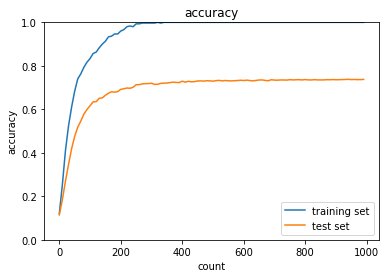

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1287
Generation: 20. 正答率(トレーニング) = 0.20666666666666667
                : 20. 正答率(テスト) = 0.1585
Generation: 30. 正答率(トレーニング) = 0.3
                : 30. 正答率(テスト) = 0.2087
Generation: 40. 正答率(トレーニング) = 0.36666666666666664
                : 40. 正答率(テスト) = 0.2712
Generation: 50. 正答率(トレーニング) = 0.44
                : 50. 正答率(テスト) = 0.3248
Generation: 60. 正答率(トレーニング) = 0.49666666666666665
                : 60. 正答率(テスト) = 0.3705
Generation: 70. 正答率(トレーニング) = 0.54
                : 70. 正答率(テスト) = 0.396
Generation: 80. 正答率(トレーニング) = 0.58
                : 80. 正答率(テスト) = 0.4184
Generation: 90. 正答率(トレーニング) = 0.6033333333333334
                : 90. 正答率(テスト) = 0.4337
Generation: 100. 正答率(トレーニング) = 0.6066666666666667
                : 100. 正答率(テスト) = 0.4373
Generation: 110. 正答率(トレーニング) = 0.64
                : 110. 正答率(テスト) = 0.4631
Generation: 120. 正答率(トレーニング) = 0.6566666666666666
                : 120. 正答

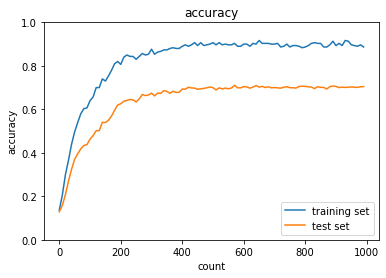

In [ ]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19333333333333333
                : 10. 正答率(テスト) = 0.145
Generation: 20. 正答率(トレーニング) = 0.7466666666666667
                : 20. 正答率(テスト) = 0.5726
Generation: 30. 正答率(トレーニング) = 0.6833333333333333
                : 30. 正答率(テスト) = 0.5073
Generation: 40. 正答率(トレーニング) = 0.8666666666666667
                : 40. 正答率(テスト) = 0.6368
Generation: 50. 正答率(トレーニング) = 0.8366666666666667
                : 50. 正答率(テスト) = 0.6478
Generation: 60. 正答率(トレーニング) = 0.9166666666666666
                : 60. 正答率(テスト) = 0.7269
Generation: 70. 正答率(トレーニング) = 0.9033333333333333
                : 70. 正答率(テスト) = 0.7128
Generation: 80. 正答率(トレーニング) = 0.57
                : 80. 正答率(テスト) = 0.4455
Generation: 90. 正答率(トレーニング) = 0.92
                : 90. 正答率(テスト) = 0.7236
Generation: 100. 正答率(トレーニング) = 0.75
                : 100. 正答率(テスト) = 0.5681
Generation: 110. 正答率(トレーニング) = 0.9466666666666667
                : 110. 正答率(テスト) = 0.7542
Generation: 120. 正答率(トレーニング) = 0.78
             

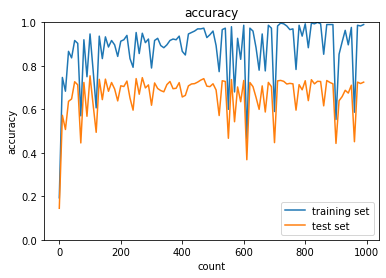

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13333333333333333
                : 10. 正答率(テスト) = 0.0956
Generation: 20. 正答率(トレーニング) = 0.14333333333333334
                : 20. 正答率(テスト) = 0.111
Generation: 30. 正答率(トレーニング) = 0.16333333333333333
                : 30. 正答率(テスト) = 0.1232
Generation: 40. 正答率(トレーニング) = 0.18666666666666668
                : 40. 正答率(テスト) = 0.1517
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.1715
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.1953
Generation: 70. 正答率(トレーニング) = 0.28
                : 70. 正答率(テスト) = 0.2236
Generation: 80. 正答率(トレーニング) = 0.33
                : 80. 正答率(テスト) = 0.258
Generation: 90. 正答率(トレーニング) = 0.36666666666666664
                : 90. 正答率(テスト) = 0.2782
Generation: 100. 正答率(トレーニング) = 0.39
                : 100. 正答率(テスト) = 0.2989
Generation: 110. 正答率(トレーニング) = 0.41
                : 110. 正答率(テスト) = 0.329
Generation: 120. 正答率(トレーニング) = 0.44
                : 120. 正答率(テスト) = 0.3516
Generation: 

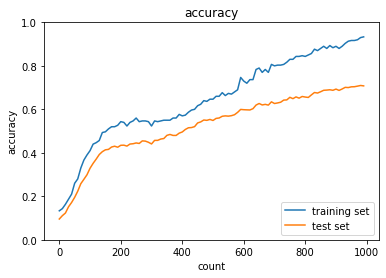

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1116
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1256
Generation: 30. 正答率(トレーニング) = 0.17666666666666667
                : 30. 正答率(テスト) = 0.1456
Generation: 40. 正答率(トレーニング) = 0.22
                : 40. 正答率(テスト) = 0.1732
Generation: 50. 正答率(トレーニング) = 0.25666666666666665
                : 50. 正答率(テスト) = 0.205
Generation: 60. 正答率(トレーニング) = 0.3
                : 60. 正答率(テスト) = 0.2383
Generation: 70. 正答率(トレーニング) = 0.33666666666666667
                : 70. 正答率(テスト) = 0.2631
Generation: 80. 正答率(トレーニング) = 0.3466666666666667
                : 80. 正答率(テスト) = 0.2804
Generation: 90. 正答率(トレーニング) = 0.36666666666666664
                : 90. 正答率(テスト) = 0.2976
Generation: 100. 正答率(トレーニング) = 0.37666666666666665
                : 100. 正答率(テスト) = 0.3128
Generation: 110. 正答率(トレーニング) = 0.42
                : 110. 正答率(テスト) = 0.3288
Generation: 120. 正答率(トレーニング) = 0.4666666666666667
         

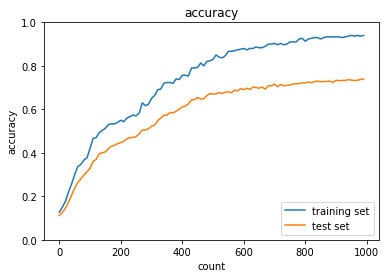

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Section4：畳み込みニューラルネットワークの概念
### 要点まとめ
- CNNでは画像データだけでなく次元間で繋がりがあるデータを扱える。（例：　１次元　音声、２次元　フーリエ変換した音声、３次元　CTスキャン画像）
- 畳み込み層及びプーリング層を通して特徴を抽出し、その後全結合層を通して欲しい出力結果の形にする。畳み込み層で使用するフィルターは全結合層でいう重みと同じ。

### 確認テスト
「サイズ６×６の入力画像を、サイズ２×２のフィルタで畳み込んだ時の出力画像サイズを答えよ。なおストライドとパディングは１とする。」
### 考察
パディングは高さと幅で異なる値を使うこともできる。

# simple convolution network

## image to column

In [ ]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    # 切り捨て除算
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] im2colの処理を確認しよう
・関数内でtransposeの処理をしている行をコメントアウトして下のコードを実行してみよう<br>
・input_dataの各次元のサイズやフィルターサイズ・ストライド・パディングを変えてみよう

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 3
filter_w = 3
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')

========== input_data ===========
 [[[[67. 36. 12. 50.]
   [40. 31.  9. 32.]
   [61. 76. 79. 47.]
   [60. 40. 37. 91.]]]


 [[[35. 50. 99. 93.]
   [40. 19. 73. 78.]
   [67. 45. 63.  0.]
   [27. 75. 59. 45.]]]]
============= col ==============
 [[67. 36. 12. 40. 31.  9. 61. 76. 79.]
 [36. 12. 50. 31.  9. 32. 76. 79. 47.]
 [40. 31.  9. 61. 76. 79. 60. 40. 37.]
 [31.  9. 32. 76. 79. 47. 40. 37. 91.]
 [35. 50. 99. 40. 19. 73. 67. 45. 63.]
 [50. 99. 93. 19. 73. 78. 45. 63.  0.]
 [40. 19. 73. 67. 45. 63. 27. 75. 59.]
 [19. 73. 78. 45. 63.  0. 75. 59. 45.]]


## column to image

In [ ]:
# ２次元配列を画像データに変換
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_shape
    # 切り捨て除算    
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] col2imの処理を確認しよう
・im2colの確認で出力したcolをimageに変換して確認しよう

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# ここにcol2imでの処理を書こう
img = col2im(col, input_shape=input_data.shape, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print(img)

[[[[ 67.  72.  24.  50.]
   [ 80. 124.  36.  64.]
   [122. 304. 316.  94.]
   [ 60.  80.  74.  91.]]]


 [[[ 35. 100. 198.  93.]
   [ 80.  76. 292. 156.]
   [134. 180. 252.   0.]
   [ 27. 150. 118.  45.]]]]


## convolution class

In [ ]:
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


## pooling class

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        #maxプーリング
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


## sinple convolution network class

In [ ]:
class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.316
                : 10. 正答率(テスト) = 0.29
Generation: 20. 正答率(トレーニング) = 0.284
                : 20. 正答率(テスト) = 0.26
Generation: 30. 正答率(トレーニング) = 0.432
                : 30. 正答率(テスト) = 0.46
Generation: 40. 正答率(トレーニング) = 0.552
                : 40. 正答率(テスト) = 0.57
Generation: 50. 正答率(トレーニング) = 0.672
                : 50. 正答率(テスト) = 0.64
Generation: 60. 正答率(トレーニング) = 0.706
                : 60. 正答率(テスト) = 0.74
Generation: 70. 正答率(トレーニング) = 0.784
                : 70. 正答率(テスト) = 0.69
Generation: 80. 正答率(トレーニング) = 0.806
                : 80. 正答率(テスト) = 0.78
Generation: 90. 正答率(トレーニング) = 0.85
                : 90. 正答率(テスト) = 0.77
Generation: 100. 正答率(トレーニング) = 0.868
                : 100. 正答率(テスト) = 0.77
Generation: 110. 正答率(トレーニング) = 0.858
                : 110. 正答率(テスト) = 0.78
Generation: 120. 正答率(トレーニング) = 0.866
                : 120. 正答率(テスト) = 0.73
Generation: 130. 正答率(トレーニング) = 0.874
                : 130. 正答率(テスト) = 0.78
Generation: 140. 正答率(

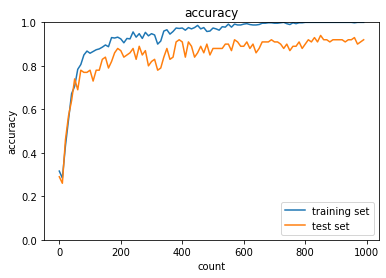

In [ ]:
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:500], d_train[:500]
x_test, d_test = x_test[:100], d_test[:100]


network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 10

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Section5：最新のCNN
### 要点まとめ
- AlexNet：５層の畳み込み層およびプーリング層など、それに続く3層の全結合槽から構成される。
- 全結合層に変換する際にFlattenを使用することでベクトルへ変換可能。
- Global Max Pooling：各チャンネルの最大値を抽出する。
- Global Average Pooling：各チャンネルの平均値を抽出する。
- Poolingは適当な処理に思えるが、Flattenよりも性能がよく、非常に特徴量を上手く掴む事ができる。
- 全結合層の出力にドロップアウトを使用している。